In [26]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def info(df, head=True):
    print(df.shape)
    print(df.columns)
    if head:
        display(df.head())
    else:
        display(df)

In [3]:
!ls cleaned_data

full-pge-with-nrel
nrel_full.csv
nrel_sample.csv
pge-monthly-consumption_2013-2020.csv
pge-monthly-consumption_2013-2020_with-zipcodes-and-cities.cpg
pge-monthly-consumption_2013-2020_with-zipcodes-and-cities.dbf
pge-monthly-consumption_2013-2020_with-zipcodes-and-cities.prj
pge-monthly-consumption_2013-2020_with-zipcodes-and-cities.shp
pge-monthly-consumption_2013-2020_with-zipcodes-and-cities.shx
pge-monthly-elec-by-zip_2013-2020.csv
pge-monthly-full-cleaned-by-zip_2013-2020.csv
pge-monthly-gas-by-zip_2013-2020.csv


In [4]:
!ls cleaned_data/full-pge-with-nrel

pge-energy-consumption-with-nrel-solar_2013-2019.cpg
pge-energy-consumption-with-nrel-solar_2013-2019.dbf
pge-energy-consumption-with-nrel-solar_2013-2019.prj
pge-energy-consumption-with-nrel-solar_2013-2019.shp
pge-energy-consumption-with-nrel-solar_2013-2019.shx


In [5]:
path_to_filename = 'cleaned_data/full-pge-with-nrel/pge-energy-consumption-with-nrel-solar_2013-2019.shp'
pge_with_nrel_full = gpd.read_file(path_to_filename)

In [6]:
info(pge_with_nrel_full)

(29816, 32)
Index(['zip', 'city', 'state', 'latitude_x', 'longitude_', 'timezone', 'dst',
       'ZIPCODE', 'MONTH', 'YEAR', 'CUSTOMERCL', 'COMBINED', 'TOTALCUSTO',
       'TOTALKWH', 'AVERAGEKWH', 'TOTALTHM', 'AVERAGETHM', 'TOTALTHERM',
       'AVERAGETHE', 'City_1', 'Month_1', 'Year_1', 'GHI', 'DHI', 'DNI',
       'Wind Speed', 'Temperatur', 'Solar Zeni', 'zipcode_1', 'latitude_y',
       'longitud_1', 'geometry'],
      dtype='object')


,zip,city,state,latitude_x,longitude_,timezone,dst,ZIPCODE,MONTH,YEAR,...,GHI,DHI,DNI,Wind Speed,Temperatur,Solar Zeni,zipcode_1,latitude_y,longitud_1,geometry
0,94564,Pinole,CA,37.997509,-122.29208,-8.0,1.0,94564,1,2013,...,116.130376,29.180108,222.919355,2.123253,7.276882,105.581747,94564,37.516687,-122.29208,POINT (-122.29208 37.99751)
1,94564,Pinole,CA,37.997509,-122.29208,-8.0,1.0,94564,1,2013,...,116.130376,29.180108,222.919355,2.123253,7.276882,105.581747,94564,37.516687,-122.29208,POINT (-122.29208 37.99751)
2,94564,Pinole,CA,37.997509,-122.29208,-8.0,1.0,94564,2,2013,...,162.379464,38.666667,262.790179,2.107887,9.022321,99.577827,94564,37.516687,-122.29208,POINT (-122.29208 37.99751)
3,94564,Pinole,CA,37.997509,-122.29208,-8.0,1.0,94564,2,2013,...,162.379464,38.666667,262.790179,2.107887,9.022321,99.577827,94564,37.516687,-122.29208,POINT (-122.29208 37.99751)
4,94564,Pinole,CA,37.997509,-122.29208,-8.0,1.0,94564,3,2013,...,190.545699,70.012097,211.274194,2.017608,11.189516,91.109973,94564,37.516687,-122.29208,POINT (-122.29208 37.99751)


<AxesSubplot:xlabel='DHI', ylabel='GHI'>

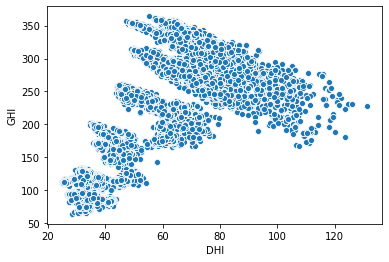

In [12]:
sns.scatterplot(data=pge_with_nrel_full, x='DHI', y='GHI')

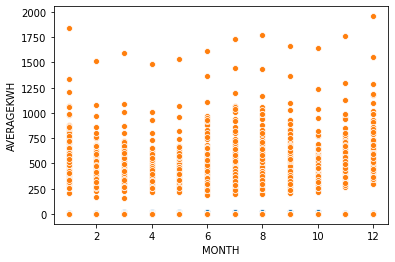

In [33]:
plt.figure()
sns.scatterplot(data=pge_with_nrel_full[pge_with_nrel_full['YEAR']==2015], x='MONTH', y='Temperatur')

sns.scatterplot(data=pge_with_nrel_full[pge_with_nrel_full['YEAR']==2015], x='MONTH', y='AVERAGEKWH')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

In [78]:
numericals = ['MONTH', 'YEAR',  'TOTALCUSTO',
       'TOTALKWH', 'AVERAGEKWH', 'TOTALTHM', 'AVERAGETHM', 'TOTALTHERM',
       'AVERAGETHE', 'Month_1', 'Year_1', 'GHI', 'DHI', 'DNI',
       'Wind Speed', 'Temperatur', 'Solar Zeni']
scaler = StandardScaler()
print(scaler.fit(pge_with_nrel_full[numericals]))
StandardScaler()
print(scaler.mean_)
transformed = scaler.transform(pge_with_nrel_full[numericals])
transformed_df = pd.DataFrame(transformed, columns=numericals)
transformed_df['YEAR'] = pge_with_nrel_full['YEAR']
transformed_df['MONTH'] = pge_with_nrel_full['MONTH']
transformed_df['timescale'] = pge_with_nrel_full['YEAR'] + (pge_with_nrel_full['MONTH'] / 12)
transformed_df['zipcode'] = pge_with_nrel_full['ZIPCODE']

StandardScaler(copy=True, with_mean=True, with_std=True)
[6.48054736e+00 2.01578736e+03 9.12452921e+03 2.14493802e+06
 2.33234941e+02 1.42555847e+05 1.71253689e+01 2.04290293e+04
 2.40374296e+00 6.48054736e+00 2.01578736e+03 2.09355676e+02
 5.59281267e+01 2.63484774e+02 2.55161639e+00 1.42410646e+01
 9.00185482e+01]


/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [79]:
transformed_df

,MONTH,YEAR,TOTALCUSTO,TOTALKWH,AVERAGEKWH,TOTALTHM,AVERAGETHM,TOTALTHERM,AVERAGETHE,Month_1,Year_1,GHI,DHI,DNI,Wind Speed,Temperatur,Solar Zeni,timescale,zipcode
0,1,2013,-0.382616,0.531131,1.184734,-0.569001,-0.502592,-0.191758,-0.204895,-1.572748,-1.379958,-1.114321,-1.386346,-0.516730,-0.612186,-2.000604,1.266529,2013.083333,94564
1,1,2013,-0.472144,-0.693543,-0.837934,1.676153,2.168059,-0.191758,-0.204895,-1.572748,-1.379958,-1.114321,-1.386346,-0.516730,-0.612186,-2.000604,1.266529,2013.083333,94564
2,2,2013,-0.382935,0.304329,0.811097,-0.569001,-0.502592,-0.191758,-0.204895,-1.285779,-1.379958,-0.561506,-0.894659,-0.008848,-0.634145,-1.499190,0.777932,2013.166667,94564
3,2,2013,-0.471187,-0.693543,-0.837934,0.980654,1.346320,-0.191758,-0.204895,-1.285779,-1.379958,-0.561506,-0.894659,-0.008848,-0.634145,-1.499190,0.777932,2013.166667,94564
4,3,2013,-0.384531,0.306157,0.814690,-0.569001,-0.502592,-0.191758,-0.204895,-0.998810,-1.379958,-0.224835,0.729970,-0.665068,-0.763166,-0.876620,0.088820,2013.250000,94564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29811,10,2019,0.288290,-0.693543,-0.837934,1.136316,0.641973,-0.191758,-0.204895,1.009974,1.590502,-0.156604,-0.955824,0.691583,-0.414912,0.697846,0.553383,2019.833333,94115
29812,11,2019,1.174799,1.161567,0.412312,-0.569001,-0.502592,-0.191758,-0.204895,1.296943,1.590502,-1.047764,-1.156040,-0.622951,-0.796467,-0.189745,1.139147,2019.916667,94115
29813,11,2019,0.286056,-0.693543,-0.837934,1.813023,1.111538,-0.191758,-0.204895,1.296943,1.590502,-1.047764,-1.156040,-0.622951,-0.796467,-0.189745,1.139147,2019.916667,94115
29814,12,2019,1.172884,1.494922,0.638650,-0.569001,-0.502592,-0.191758,-0.204895,1.583913,1.590502,-1.614499,-1.168229,-1.900793,0.148862,-0.826888,1.406651,2020.000000,94115


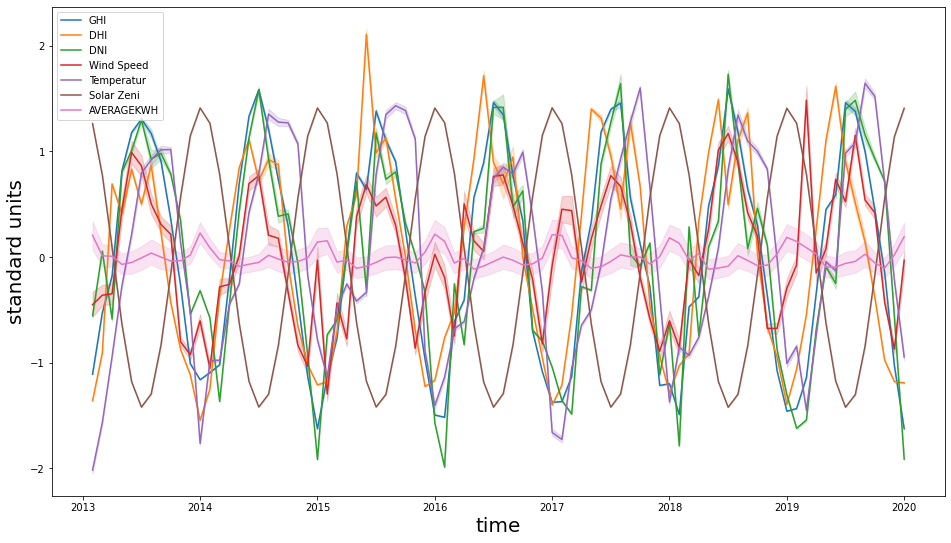

In [122]:
plt.figure(figsize=(16,9))

to_plot = ['GHI', 'DHI', 'DNI',
       'Wind Speed', 'Temperatur', 'Solar Zeni', 'AVERAGEKWH']
for c in to_plot:
    sns.lineplot(data=transformed_df, x='timescale', y=c, label=c)

# sns.lineplot(data=transformed_df, x='timescale', y='AVERAGEKWH', label='avgkwh')
# sns.lineplot(data=transformed_df, x='timescale', y='Solar Zeni', label='solar zenith angle')



# sns.lineplot(data=transformed_df, x='timescale', y='Solar Zeni', label='solar zenith angle')
# sns.lineplot(data=transformed_df, x='timescale', y='Temperatur', label='temp')

# plt.title('Different measurements vs Time ')
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#        ncol=2, mode="expand", borderaxespad=0.)
plt.legend()
plt.xlabel("time", size=20)
plt.ylabel("standard units", size=20)
plt.show()

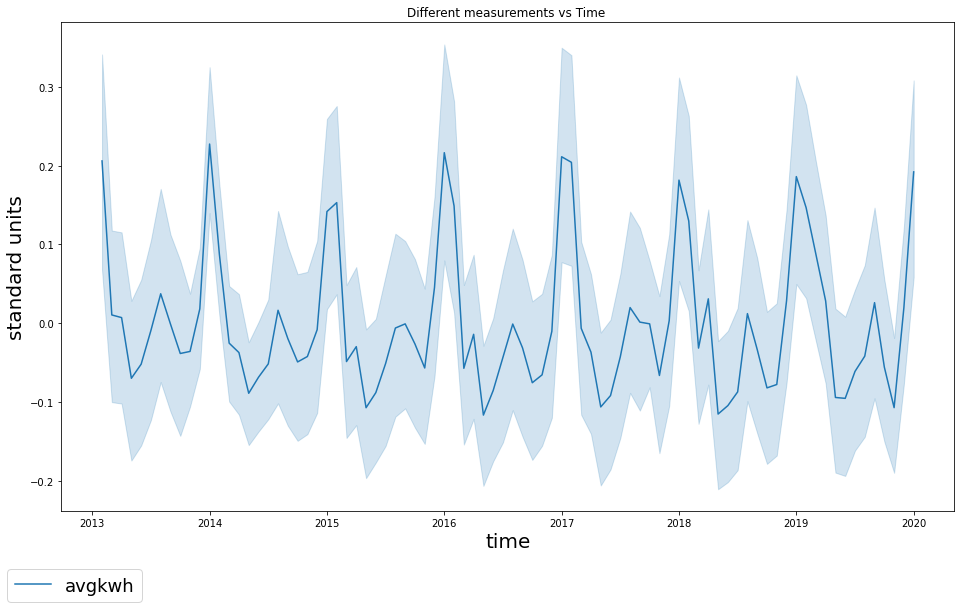

In [116]:
plt.figure(figsize=(16,9))

# to_plot = ['GHI', 'DHI', 'DNI',
#        'Wind Speed', 'Temperatur', 'Solar Zeni', 'AVERAGEKWH']
# for c in to_plot:
#     sns.lineplot(data=transformed_df, x='timescale', y=c, label=c)

sns.lineplot(data=transformed_df, x='timescale', y='AVERAGEKWH', label='avgkwh')
# sns.lineplot(data=transformed_df, x='timescale', y='Solar Zeni', label='solar zenith angle')



# sns.lineplot(data=transformed_df, x='timescale', y='Solar Zeni', label='solar zenith angle')
# sns.lineplot(data=transformed_df, x='timescale', y='Temperatur', label='temp')


plt.title('Different measurements vs Time ')
plt.legend(bbox_to_anchor=[.1, -.1], fontsize=18,  ncol=len(to_plot))
plt.xlabel("time", size=20)
plt.ylabel("standard units", size=20)
plt.show()

In [68]:
min(transformed_df['Temperatur'])

-2.8936903190385057